In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\sk88\Documents\Python")

from Function_files.fitting_functions import gaussian
from Function_files.math_functions import zoom

import matplotlib.pyplot as mp
import numpy as np
import pandas as pd

import os

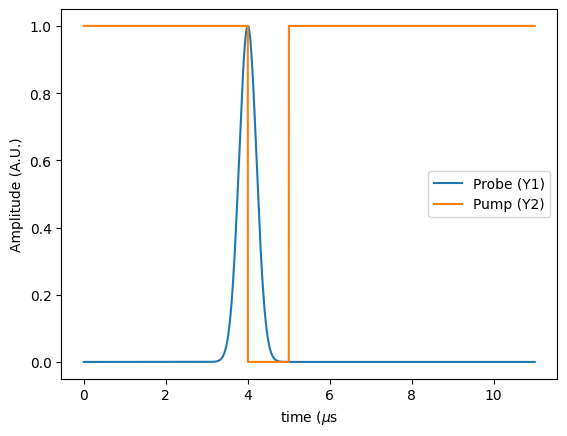

In [18]:
zoom_in = False

sample_rate = 32E9
storage_time = 1e-6
control_offset = 0e-6
control_duration = 8e-6
sequence_delay = 2e-6

sequence_length = storage_time + control_duration + sequence_delay
samples = round(sequence_length*sample_rate)

x = np.linspace(0, sequence_length, samples)
time = x*1e6

FWHM = 0.5e-6
sigma = FWHM/(2*np.sqrt(2*np.log(2)))
g_pulse = gaussian(x, 1, 0, control_duration/2, sigma)
square = np.concatenate([np.ones(round((control_duration-control_offset)*sample_rate/2)), np.zeros(round(storage_time*sample_rate)), np.ones(round((control_duration+control_offset+sequence_delay*2)*sample_rate/2))])

if zoom_in:
    m, n = zoom(x, (control_duration/2-storage_time, control_duration/2+storage_time))
else:
    m = 0
    n = -1

fig, ax = mp.subplots()
ax.plot(time[m:n], g_pulse[m:n], label='Probe (Y1)')
ax.plot(time[m:n], square[m:n], label='Pump (Y2)')
ax.set(xlabel='time ($\mu$s', ylabel='Amplitude (A.U.)')
ax.legend()

In [19]:
waveform_data = {'Y1': g_pulse,'Y2' : square}
df = pd.DataFrame(waveform_data)
df.to_csv('ST_1us.csv', index=False)